In [64]:
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import mnist
from keras.optimizers import SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
#load data set( read in website keras.io)
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [54]:
print("train shape " ,x_train.shape,"test shape :",x_test.shape,sep="\n")
print("label train shape :",y_train.shape,"label test shape :",y_test.shape,sep="\n")

train shape 
(60000, 28, 28)
test shape :
(10000, 28, 28)
label train shape :
(60000,)
label test shape :
(10000,)


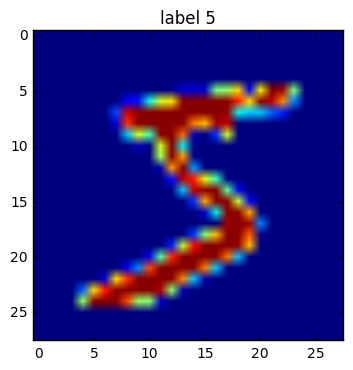

In [55]:
# plot image sample
plt.imshow(x_train[0])
plt.title("label " + str(y_train[0]))

In [56]:
# set parameter model
nb_epochs = 200 # so epoch training
batch_size = 128 # so batch moi lan training
verbose = 1 # display 1 thong so khi model chay
nb_class = 10 # co 10 class label
optimizer = SGD() # optimizer bang SGD
nb_hidden = 128 # so hidden layer
validation_split = 0.2 # dung de validation khi training

In [57]:
# preprocessing data
# reshape data 28x28 pixel to 28x28 = 728 
# scaler data set with 255
shape = 784
x_train = x_train.reshape(-1,shape).astype("float32")
x_test =  x_test.reshape(-1,shape).astype("float32")

In [58]:
x_train /= 255
x_test /= 255

In [59]:
# change to label to categorical
y_train = np_utils.to_categorical(y_train)


In [36]:
y_train[1]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [37]:
# build model
model = Sequential()

In [40]:
model.add(Dense(nb_hidden,input_shape =(784,),activation="relu"))
model.add(Dense(nb_class,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 104,468
Trainable params: 104,468
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer=SGD(lr=0.2),loss ="categorical_crossentropy",metrics=["accuracy"])

In [43]:
model.fit(x_train,y_train,epochs=nb_epochs,validation_split= validation_split)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 3s - loss: 0.7552 - acc: 0.7519 - val_loss: 0.2825 - val_acc: 0.9278
Epoch 2/200
48000/48000 [==============================] - 2s - loss: 0.2484 - acc: 0.9330 - val_loss: 0.2154 - val_acc: 0.9432
Epoch 3/200
48000/48000 [==============================] - 2s - loss: 0.1804 - acc: 0.9524 - val_loss: 0.1843 - val_acc: 0.9527
Epoch 4/200
48000/48000 [==============================] - 2s - loss: 0.1428 - acc: 0.9607 - val_loss: 0.2187 - val_acc: 0.9438
Epoch 5/200
48000/48000 [==============================] - 2s - loss: 0.1213 - acc: 0.9666 - val_loss: 0.1880 - val_acc: 0.9493
Epoch 6/200
48000/48000 [==============================] - 2s - loss: 0.1067 - acc: 0.9704 - val_loss: 0.1571 - val_acc: 0.9633
Epoch 7/200
48000/48000 [==============================] - 2s - loss: 0.0939 - acc: 0.9741 - val_loss: 0.1897 - val_acc: 0.9573
Epoch 8/200
48000/48000 [=============================

In [44]:
y_predict = model.predict(x_test)

In [46]:
y_predict_categorical = np.argmax(y_predict,axis=1)

In [61]:
from sklearn.metrics import classification_report,accuracy_score

In [60]:
print(classification_report(y_test,y_predict_categorical))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.96      0.97      0.96      1032
          3       0.98      0.96      0.97      1010
          4       0.98      0.96      0.97       982
          5       0.97      0.95      0.96       892
          6       0.97      0.97      0.97       958
          7       0.98      0.98      0.98      1028
          8       0.94      0.98      0.96       974
          9       0.96      0.97      0.96      1009

avg / total       0.97      0.97      0.97     10000



In [62]:
print(accuracy_score(y_test,y_predict_categorical))

0.9708


In [66]:
#model with dropout
model1 = Sequential()
model1.add(Dense(nb_hidden,input_shape =(784,),activation="relu"))
model1.add(Dense(nb_class,activation="softmax"))
model1.add(Dropout(rate=0.1))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [67]:
model1.compile(optimizer=SGD(lr=.2),loss ="categorical_crossentropy",metrics=["accuracy"])
model1.fit(x_train,y_train,epochs=nb_epochs,validation_split=validation_split,verbose=1,batch_size=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s - loss: 1.9357 - acc: 0.8003 - val_loss: 0.2511 - val_acc: 0.9287
Epoch 2/200
48000/48000 [==============================] - 1s - loss: 1.7789 - acc: 0.8463 - val_loss: 0.1929 - val_acc: 0.9476
Epoch 3/200
48000/48000 [==============================] - 1s - loss: 1.7635 - acc: 0.8564 - val_loss: 0.1583 - val_acc: 0.9557
Epoch 4/200
48000/48000 [==============================] - 1s - loss: 1.7462 - acc: 0.8640 - val_loss: 0.1408 - val_acc: 0.9598
Epoch 5/200
48000/48000 [==============================] - 1s - loss: 1.7246 - acc: 0.8698 - val_loss: 0.1294 - val_acc: 0.9653
Epoch 6/200
48000/48000 [==============================] - 1s - loss: 1.7022 - acc: 0.8743 - val_loss: 0.1189 - val_acc: 0.9668
Epoch 7/200
48000/48000 [==============================] - 1s - loss: 1.6533 - acc: 0.8797 - val_loss: 0.1139 - val_acc: 0.9675
Epoch 8/200
48000/48000 [=============================

In [68]:
y_predict = model1.predict(x_test)
y_pre = np.argmax(y_predict,axis=1)
print(accuracy_score(y_test,y_pre))

0.9795
